In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!cd /content/drive/MyDrive/BOAZ/mini_project

In [25]:
#train = pd.read_csv('/content/drive/MyDrive/BOAZ/mini_project/train_V2.csv')
train = pd.read_csv('train_V2.csv')

In [3]:
## 데이터 크기 확인 함수
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

## 타입별 평균 크기 확인 함수
def type_memory(data) :
    for dtype in ['float','int','object']:
        selected_dtype = data.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

## 이산형 데이터 사이즈 축소 함소
def int_memory_reduce(data) :
    data_int = data.select_dtypes(include=['int'])
    converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')
    print(f"Before : {mem_usage(data_int)} -> After : {mem_usage(converted_int)}")
    data[converted_int.columns] = converted_int
    return data

## 연속형 데이터 사이즈 축소 함소
def float_memory_reduce(data) :
    data_float = data.select_dtypes(include=['float'])
    converted_float = data_float.apply(pd.to_numeric,downcast='float')
    print(f"Before : {mem_usage(data_float)} -> After : {mem_usage(converted_float)}")
    data[converted_float.columns] = converted_float
    return data

## 문자형 데이터 사이즈 축소 함소
def object_memory_reduce(data) :
    gl_obj = data.select_dtypes(include=['object']).copy()
    converted_obj = pd.DataFrame()
    for col in gl_obj.columns:
        num_unique_values = len(gl_obj[col].unique())
        num_total_values = len(gl_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:,col] = gl_obj[col].astype('category')
        else:
            converted_obj.loc[:,col] = gl_obj[col]
    print(f"Before : {mem_usage(gl_obj)} -> After : {mem_usage(converted_obj)}")
    data[converted_obj.columns] = converted_obj
    return data

In [4]:
mem_usage(train)
type_memory(train)
int_memory_reduce(train)
float_memory_reduce(train)
object_memory_reduce(train)
mem_usage(train)

Average memory usage for float columns: 29.08 MB
Average memory usage for int columns: 32.23 MB
Average memory usage for object columns: 235.18 MB
Before : 644.63 MB -> After : 122.99 MB
Before : 203.57 MB -> After : 101.78 MB
Before : 1175.91 MB -> After : 545.27 MB


'770.04 MB'

## 1. 결측치 삭제

In [26]:
# 결측치 삭제
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
pd.set_option('display.max_columns', None)

In [27]:
train = train.dropna(axis = 0) # 행의 개수 하나 줄어들었음
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [28]:
len(train)

4446965

## 2. 이상치 삭제(정상적인 게임에서 나올 수 없는 값)

##### 1) 매치 최대 참여 인원 수가 100명인데 killplace가 100이상인 경우(순위가 100을 넘을 수 없음)

In [29]:
# 1
train = train[train['killPlace'] <= 100]
len(train)

4446964

##### 2) 움직인 거리(move_distance)가 없는데 무기를 2개 이상 획득한 경우
+ move_distance = rideDistance + swimDistance + walkDistance

In [30]:
# 2
move_distance = train[['rideDistance','swimDistance','walkDistance']]
move_distance = move_distance.sum(axis = 1).to_frame()
move_distance.columns = ['moveDistance']
train = pd.concat([train, move_distance],axis = 1)
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,moveDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,2311.0000
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,81.7000
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815,790.8840
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,2748.0000


In [31]:
train = train[~((train['moveDistance'] == 0) & (train['weaponsAcquired'] > 2))]
len(train)

4441199

##### 3) moveDistance가 0인데 kill이 1이상인 경우

In [32]:
# 3. 
train = train[~((train['moveDistance'] == 0) & (train['kills'] > 0))]
len(train)

4440966

##### 4) rideDistance가 0인데 roadKills가 1이상인 경우

In [33]:
# 4.
train = train[~((train['rideDistance'] == 0) & (train['roadKills'] > 0))]
len(train)

4440780

## 3. matchType

In [34]:
# matchtype별로 묶음(solo, duo, squad, others 4가지로)
train.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'squad',inplace=True)
train.matchType.replace(['duo-fpp','normal-duo-fpp','normal-duo'],'duo',inplace=True)
train.matchType.replace(['solo-fpp','normal-solo-fpp','normal-solo'],'solo',inplace=True)
train.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'others',inplace=True)

In [35]:
train.matchType.value_counts()

squad     2398956
duo       1315818
solo       716126
others       9880
Name: matchType, dtype: int64

## 4. VIF로 변수 선택
+ PCA는 새로운 차원을 만들어내기 때문에 설명성이 부족

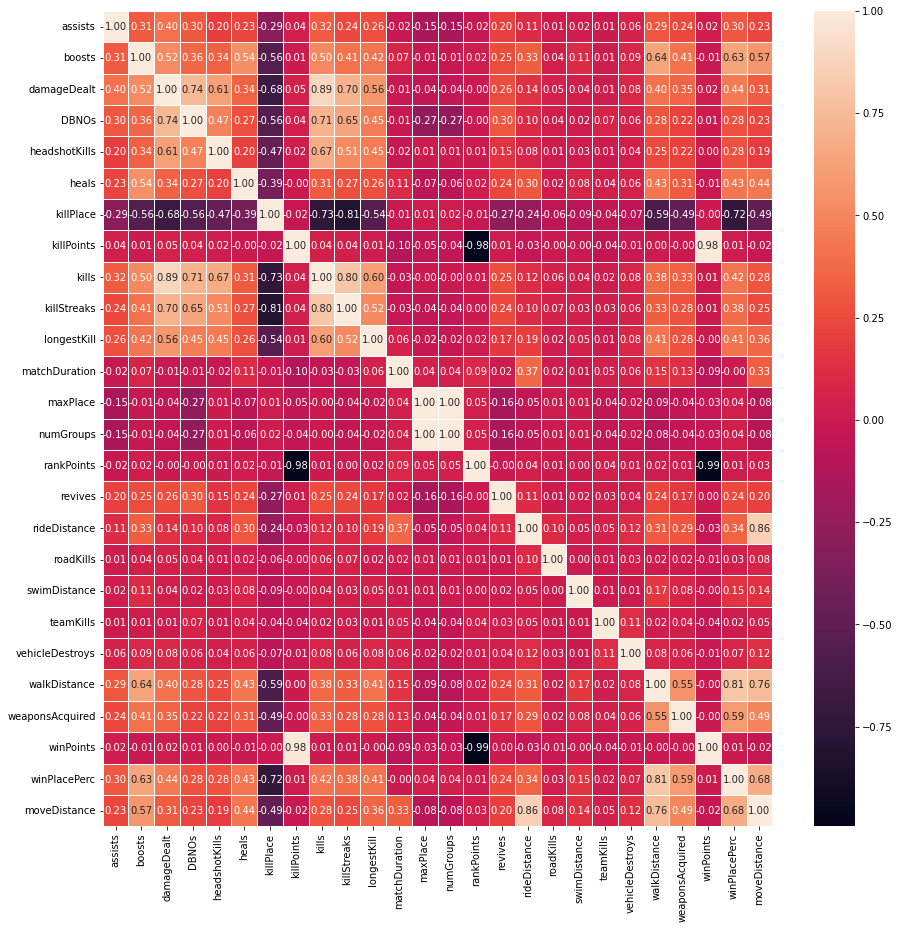

In [36]:
# 변수간 상관관계
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [38]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,moveDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,2311.0000
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,81.7000
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815,790.8840
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,2748.0000


pip install statsmodels

In [43]:
train_vif = train[['rideDistance', 'swimDistance', 'walkDistance', 'moveDistance']]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 
# 즉 이값이 높을수록 종속성이 높다는 뜻

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif['Feature'] = train_vif.columns
vif.sort_values(by='VIF_Factor', ascending=True)

# --> vif_factor의 값이 무한대이므로 moveDistance 제외하고 삭제

C:\Users\user\anaconda3\envs\virtual_3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,Feature
0,inf,rideDistance
1,inf,swimDistance
2,inf,walkDistance
3,inf,moveDistance


In [45]:
vif_drop = ['Id','groupId', 'matchId', 'matchType', 'killPoints', 'rankPoints', 'winPoints', 'maxPlace', 
            'rideDistance', 'swimDistance', 'walkDistance']
train_vif = train.drop(vif_drop, axis = 'columns')

In [46]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif['features'] = train_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,28.905279,matchDuration
1,12.860564,killPlace
2,10.993186,kills
3,9.659862,damageDealt
4,9.175682,winPlacePerc
5,6.237281,killStreaks
6,5.502791,numGroups
7,5.346764,weaponsAcquired
8,4.047280,moveDistance
9,3.763980,DBNOs


---> vif결과: rideDistance, swimDistance, walkDistance 컬럼 삭제, moveDistance만 남김
              vif값이 10이상인 matchDuration, killPlace는 삭제
              kills는 10이상이지만 없으면 안되는 값이기 때문에 히트맵에 kill과 상관관계가 높은 damageDealt 삭제

In [47]:
vif_drop = ['Id','groupId', 'matchId', 'matchType', 'killPoints', 'rankPoints', 'winPoints', 'maxPlace', 
            'rideDistance', 'swimDistance', 'walkDistance', 'matchDuration', 'damageDealt']
train_vif = train.drop(vif_drop, axis = 'columns')

In [48]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif['features'] = train_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,8.683954,winPlacePerc
1,7.237887,kills
2,5.179443,numGroups
3,5.092731,weaponsAcquired
4,4.878818,killStreaks
5,3.625917,moveDistance
6,3.549419,killPlace
7,3.288886,DBNOs
8,3.209124,boosts
9,2.119225,headshotKills


##### ---> 제거할 columns: rideDistance, swimDistance, walkDistance, killPoints, rankPoints, winPoints,  maxPlace, matchDuration, damageDealt

In [50]:
drop_col = ['rideDistance', 'swimDistance', 'walkDistance', 'killPoints', 'rankPoints', 'winPoints', 'maxPlace', 
            'matchDuration', 'damageDealt']
train = train.drop(drop_col, axis = 'columns')
train

,Id,groupId,matchId,assists,boosts,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,numGroups,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,moveDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0,0,0,60,0,0,0.00,squad,26,0,0,0,0,1,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,0,0,0,57,0,0,0.00,squad,25,0,0,0,0,5,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,0,0,0,47,0,0,0.00,duo,47,0,0,0,0,2,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,0,0,0,75,0,0,0.00,squad,30,0,0,0,0,3,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,0,0,0,45,1,1,58.53,solo,95,0,0,0,0,2,0.1875,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0,0,0,74,0,0,0.00,squad,28,0,0,0,0,3,0.1786,2311.0000
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,0,0,0,69,0,0,0.00,solo,93,0,0,0,0,6,0.2935,81.7000
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,0,0,0,66,0,0,0.00,squad,28,0,0,0,0,4,0.4815,790.8840
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,1,1,2,11,2,1,98.50,squad,25,2,0,0,0,8,0.8000,2748.0000


## 5. 불필요한 columns 제거

### 5-1) solo 사용자 모델
  + 필요 없는 Columns: DBNOS, REVIVES, TEAMKILLS, ID, groupid, matchid
  - 개인전에서 내가 데미지를 주고 남이 적을 죽이면 assists가 되나,,?

In [54]:
solo_drop = ['Id', 'groupId', 'matchId', 'DBNOs', 'revives', 'teamKills', 'assists']
solo_model = train.drop(solo_drop, axis = 'columns')
solo_model

,boosts,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,numGroups,roadKills,vehicleDestroys,weaponsAcquired,winPlacePerc,moveDistance
0,0,0,0,60,0,0,0.00,squad,26,0,0,1,0.4444,244.8000
1,0,0,0,57,0,0,0.00,squad,25,0,0,5,0.6400,1445.0445
2,0,0,0,47,0,0,0.00,duo,47,0,0,2,0.7755,161.8000
3,0,0,0,75,0,0,0.00,squad,30,0,0,3,0.1667,202.7000
4,0,0,0,45,1,1,58.53,solo,95,0,0,2,0.1875,49.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0,74,0,0,0.00,squad,28,0,0,3,0.1786,2311.0000
4446962,1,0,0,69,0,0,0.00,solo,93,0,0,6,0.2935,81.7000
4446963,0,0,0,66,0,0,0.00,squad,28,0,0,4,0.4815,790.8840
4446964,4,1,2,11,2,1,98.50,squad,25,0,0,8,0.8000,2748.0000


In [55]:
solo_model = solo_model[solo_model['matchType'] == 'solo']
solo_model

,boosts,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchType,numGroups,roadKills,vehicleDestroys,weaponsAcquired,winPlacePerc,moveDistance
4,0,0,0,45,1,1,58.53,solo,95,0,0,2,0.1875,49.75
7,0,0,0,48,0,0,0.00,solo,92,0,0,6,0.7368,3093.00
13,1,1,5,5,4,1,49.83,solo,94,0,0,6,0.8750,3354.84
17,3,0,12,13,2,1,36.00,solo,95,0,0,3,0.8211,4169.29
35,0,0,0,37,1,1,22.83,solo,94,0,0,1,0.3474,270.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446950,0,0,0,32,1,1,11.27,solo,92,0,0,5,0.5000,1559.00
4446954,0,0,0,58,0,0,0.00,solo,97,0,0,6,0.5306,2146.00
4446959,0,0,0,89,0,0,0.00,solo,95,0,0,1,0.0842,40.25
4446962,1,0,0,69,0,0,0.00,solo,93,0,0,6,0.2935,81.70


In [57]:
solo_model.to_csv("solo_model.csv")

### 5-2) duo 사용자 모델
+ 'Id', 'groupId', 'matchId' 컬럼 필요한가,,? 

### 5-3) squad 사용자 모델

## 6. 모델
+ 인코딩 필요